In [1]:
## Import the necessary Libraries to run the code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Selecting Wanshouxigong as Urban Site, Changping as Suburban Site, Huairou as Rural Site and Guanyuan and Aotizhongxin Industrial site

***Fundamental Data Understanding***

In [2]:
## loading all four datasets here

urban_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv")
suburban_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")
rural_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv")
industrial_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [3]:
## Adding the Category columns gives context to each record for later analysis

urban_df['Category'] = 'Urban'
suburban_df['Category'] = 'Suburban'
rural_df['Category'] = 'Rural'
industrial_df['Category'] = 'Industrial'

In [4]:
### Read and combine all CSV files

air_quality_df = pd.concat([urban_df, suburban_df, rural_df, industrial_df], ignore_index=True)

In [5]:
# Save the merged dataset to a CSV file

air_quality_df.to_csv("air_quality.csv", index=False)

In [6]:
# Load the CSV file into a pandas DataFrame

df = pd.read_csv("air_quality.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Category
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,Urban
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,Urban
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,Urban
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,Urban
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,Urban


In [7]:
# Combine Year, Month, Day, and Hour into a new 'Datetime' column

air_quality_df['Datetime'] = pd.to_datetime(air_quality_df[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1),format='%Y-%m-%d-%H')

In [8]:
# Check the first few rows to confirm the combined Datetime

print(air_quality_df[['year', 'month', 'day', 'hour', 'Datetime']].head())

   year  month  day  hour            Datetime
0  2013      3    1     0 2013-03-01 00:00:00
1  2013      3    1     1 2013-03-01 01:00:00
2  2013      3    1     2 2013-03-01 02:00:00
3  2013      3    1     3 2013-03-01 03:00:00
4  2013      3    1     4 2013-03-01 04:00:00


In [9]:
# Displaying basic information about the dataset

print(air_quality_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        140256 non-null  int64         
 1   year      140256 non-null  int64         
 2   month     140256 non-null  int64         
 3   day       140256 non-null  int64         
 4   hour      140256 non-null  int64         
 5   PM2.5     136908 non-null  float64       
 6   PM10      137695 non-null  float64       
 7   SO2       137044 non-null  float64       
 8   NO2       136173 non-null  float64       
 9   CO        134240 non-null  float64       
 10  O3        135704 non-null  float64       
 11  TEMP      140113 non-null  float64       
 12  PRES      140114 non-null  float64       
 13  DEWP      140111 non-null  float64       
 14  RAIN      140111 non-null  float64       
 15  wd        139654 non-null  object        
 16  WSPM      140137 non-null  float64    

In [10]:
# Get summary statistics of numerical columns

print(air_quality_df.describe())

               No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
min         1.000    2013.000000       1.000000       1.000000       0.000000   
25%      8766.750    2014.000000       4.000000       8.000000       5.750000   
50%     17532.500    2015.000000       7.000000      16.000000      11.500000   
75%     26298.250    2016.000000      10.000000      23.000000      17.250000   
max     35064.000    2017.000000      12.000000      31.000000      23.000000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   

               PM2.5           PM10            SO2            NO2  \
count  136908.000000  137695.000000  137044.000000  136173.000000   
mean       77.139050     102.120492      15.404718      47.953712   
min         2.000000       2.000000       0.285600       1.0265

In [11]:
# Check for missing values in each column

print(air_quality_df.isnull().sum())

No             0
year           0
month          0
day            0
hour           0
PM2.5       3348
PM10        2561
SO2         3212
NO2         4083
CO          6016
O3          4552
TEMP         143
PRES         142
DEWP         145
RAIN         145
wd           602
WSPM         119
station        0
Category       0
Datetime       0
dtype: int64


In [12]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


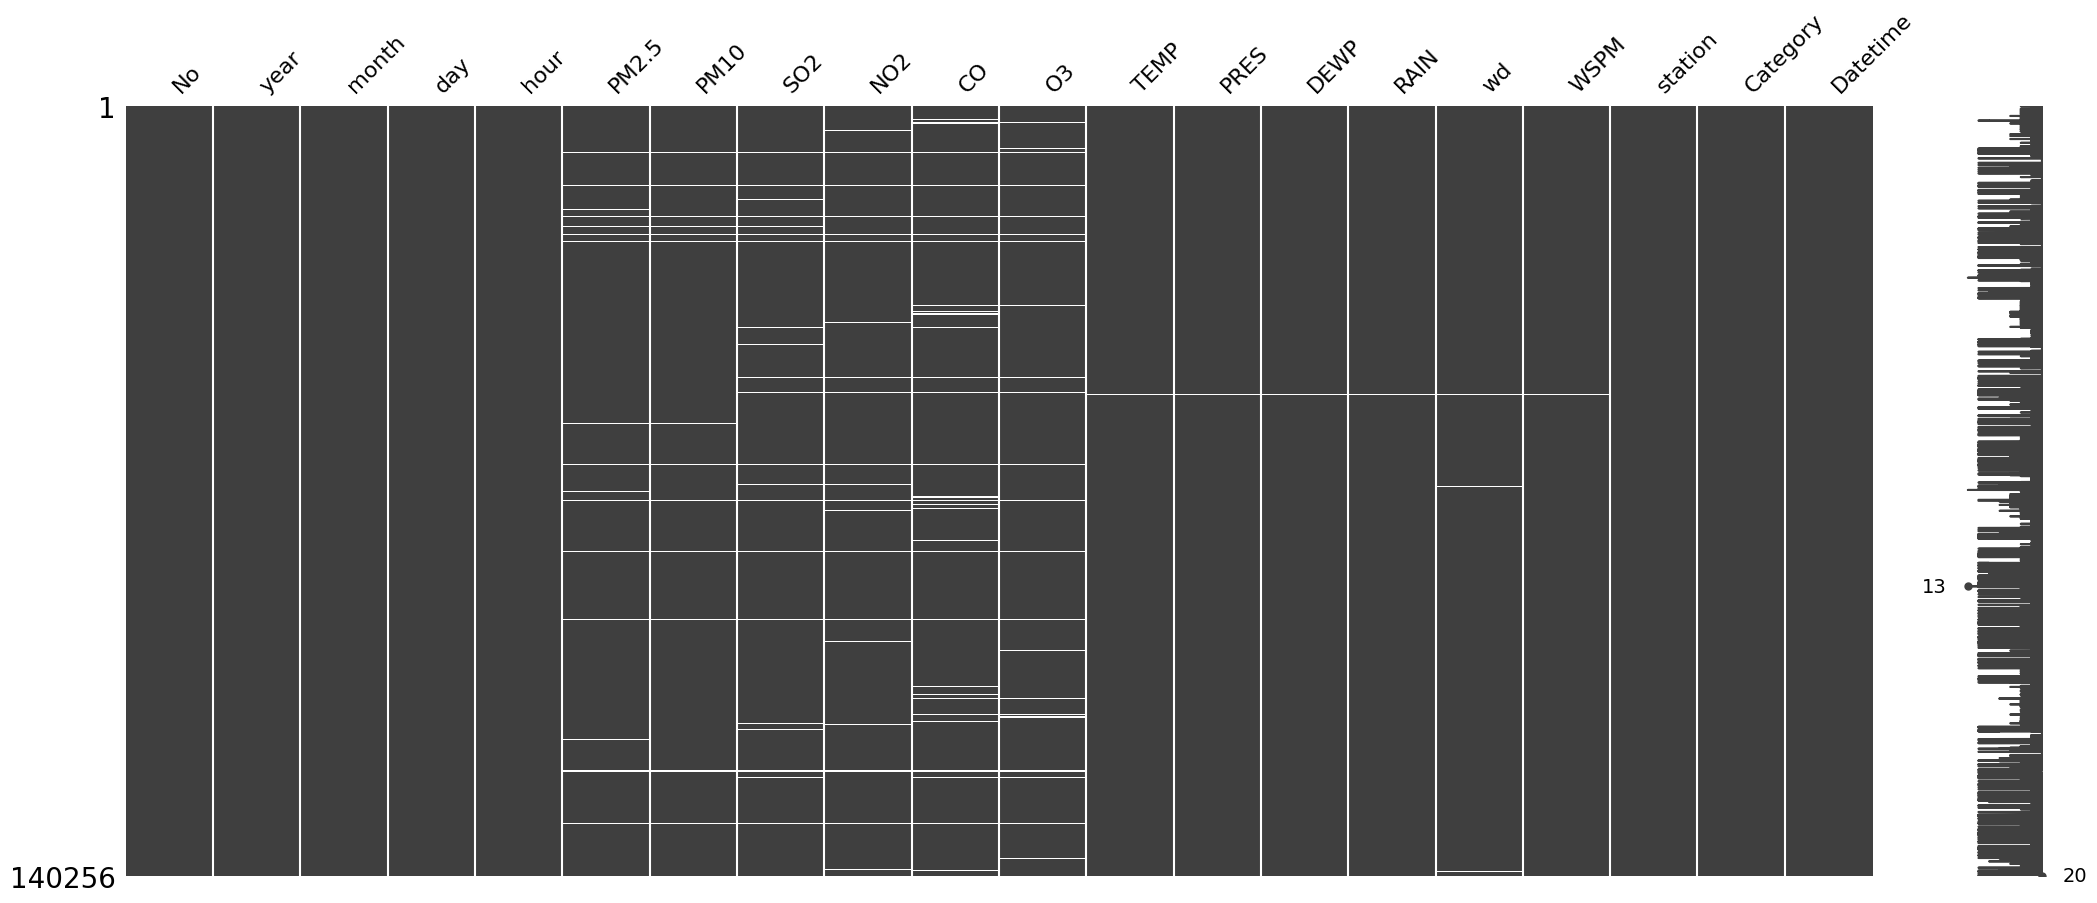

In [13]:
## Use a heatmap to visualize missing data to understand which variables have missing values and their patterns.

import missingno as msno

msno.matrix(air_quality_df)
plt.show()

In [14]:
# Check the data types of each column

print(air_quality_df.dtypes)

No                   int64
year                 int64
month                int64
day                  int64
hour                 int64
PM2.5              float64
PM10               float64
SO2                float64
NO2                float64
CO                 float64
O3                 float64
TEMP               float64
PRES               float64
DEWP               float64
RAIN               float64
wd                  object
WSPM               float64
station             object
Category            object
Datetime    datetime64[ns]
dtype: object


 ***Data pre-processing***

In [15]:
# Check for missing values in the dataset

missing_values = air_quality_df.isna().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       3348
PM10        2561
SO2         3212
NO2         4083
CO          6016
O3          4552
TEMP         143
PRES         142
DEWP         145
RAIN         145
wd           602
WSPM         119
station        0
Category       0
Datetime       0
dtype: int64


In [16]:
## Handle Missing Values
## Impute missing values in numerical columns with the mean

numerical_cols = air_quality_df.select_dtypes(include=['float64', 'int64']).columns
air_quality_df[numerical_cols] = air_quality_df[numerical_cols].fillna(air_quality_df[numerical_cols].mean())

In [17]:
## For categorical columns, fill missing values with the mode - most frequent value 

categorical_cols = air_quality_df.select_dtypes(include=['object']).columns
air_quality_df[categorical_cols] = air_quality_df[categorical_cols].fillna(air_quality_df[categorical_cols].mode().iloc[0])

In [18]:
# checking to see if missing values are handled

print("Missing values after imputation:\n", air_quality_df.isna().sum())

Missing values after imputation:
 No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Category    0
Datetime    0
dtype: int64


In [19]:
# Check for duplicates and count them

duplicate_rows = air_quality_df.duplicated()
print(duplicate_rows.sum())

0


In [20]:
# Display the duplicate rows

duplicates = air_quality_df[air_quality_df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [No, year, month, day, hour, PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station, Category, Datetime]
Index: []


Note : Feature engineering for combining year, month, day, and hour into a single Datetime column is done at the above steps. 
## Create Additional Time-Based Features: 

In [21]:
# Create a binary 'Weekend' feature (1 for weekend, 0 for weekday)

air_quality_df['DayOfWeek'] = air_quality_df['Datetime'].dt.dayofweek
air_quality_df['Weekend'] = air_quality_df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [22]:
# Check the first few rows

print(air_quality_df[['Datetime', 'DayOfWeek', 'Weekend']].head())

             Datetime  DayOfWeek  Weekend
0 2013-03-01 00:00:00          4        0
1 2013-03-01 01:00:00          4        0
2 2013-03-01 02:00:00          4        0
3 2013-03-01 03:00:00          4        0
4 2013-03-01 04:00:00          4        0


In [23]:
print(air_quality_df.head())

   No  year  month  day  hour  PM2.5  PM10        SO2        NO2           CO  \
0   1  2013      3    1     0    9.0   9.0   6.000000  17.000000   200.000000   
1   2  2013      3    1     1   11.0  11.0   7.000000  14.000000   200.000000   
2   3  2013      3    1     2    8.0   8.0  15.404718  16.000000   200.000000   
3   4  2013      3    1     3    8.0   8.0   3.000000  16.000000  1202.081876   
4   5  2013      3    1     4    8.0   8.0   3.000000  47.953712   300.000000   

   ...    PRES  DEWP  RAIN   wd  WSPM        station  Category  \
0  ...  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong     Urban   
1  ...  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong     Urban   
2  ...  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong     Urban   
3  ...  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong     Urban   
4  ...  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong     Urban   

             Datetime DayOfWeek Weekend  
0 2013-03-01 00:00:00         4       0  
1 2013-03-01 01:00:00         4 

In [24]:
# Create 'TimeOfDay' feature based on Hour

def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

air_quality_df['TimeOfDay'] = air_quality_df['hour'].apply(get_time_of_day)

# Check the first few rows
print(air_quality_df[['hour', 'TimeOfDay']].head())


   hour TimeOfDay
0     0     Night
1     1     Night
2     2     Night
3     3     Night
4     4     Night


In [25]:
# Save the new merged dataset to a CSV file 

air_quality_df.to_csv("updated_air_quality.csv", index=False)

In [26]:
## Removing Unnecessary Columns:
## Drop unnecessary columns

air_quality_df.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [27]:
# Verify if the columns are dropped

print(air_quality_df.head())

   No  PM2.5  PM10        SO2        NO2           CO         O3  TEMP  \
0   1    9.0   9.0   6.000000  17.000000   200.000000  62.000000   0.3   
1   2   11.0  11.0   7.000000  14.000000   200.000000  66.000000  -0.1   
2   3    8.0   8.0  15.404718  16.000000   200.000000  59.000000  -0.6   
3   4    8.0   8.0   3.000000  16.000000  1202.081876  57.592851  -0.7   
4   5    8.0   8.0   3.000000  47.953712   300.000000  36.000000  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station Category            Datetime  \
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong    Urban 2013-03-01 00:00:00   
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong    Urban 2013-03-01 01:00:00   
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong    Urban 2013-03-01 02:00:00   
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong    Urban 2013-03-01 03:00:00   
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong    Urban 2013-03-01 04:00:00   

   DayOfWeek  Weekend TimeOfDay  
0          4        0     Night  
1     

***Statistics/computation-based analysis and Visualisation***

In [28]:
## generating general statistical summaries of the numerical and categorical variables
# Display overall dataset statistics

print(air_quality_df.describe(include='all'))

                No          PM2.5           PM10            SO2  \
count   140256.000  140256.000000  140256.000000  140256.000000   
unique         NaN            NaN            NaN            NaN   
top            NaN            NaN            NaN            NaN   
freq           NaN            NaN            NaN            NaN   
mean     17532.500      77.139050     102.120492      15.404718   
min          1.000       2.000000       2.000000       0.285600   
25%       8766.750      20.000000      35.000000       2.000000   
50%      17532.500      55.000000      81.000000       7.000000   
75%      26298.250     105.000000     141.000000      18.000000   
max      35064.000     999.000000     999.000000     411.000000   
std      10122.141      77.534138      89.766697      21.597589   

                  NO2             CO             O3           TEMP  \
count   140256.000000  140256.000000  140256.000000  140256.000000   
unique            NaN            NaN            NaN    

## Univariate analysis for the distribution of a all variables and Bar Chart for Categorical Data 

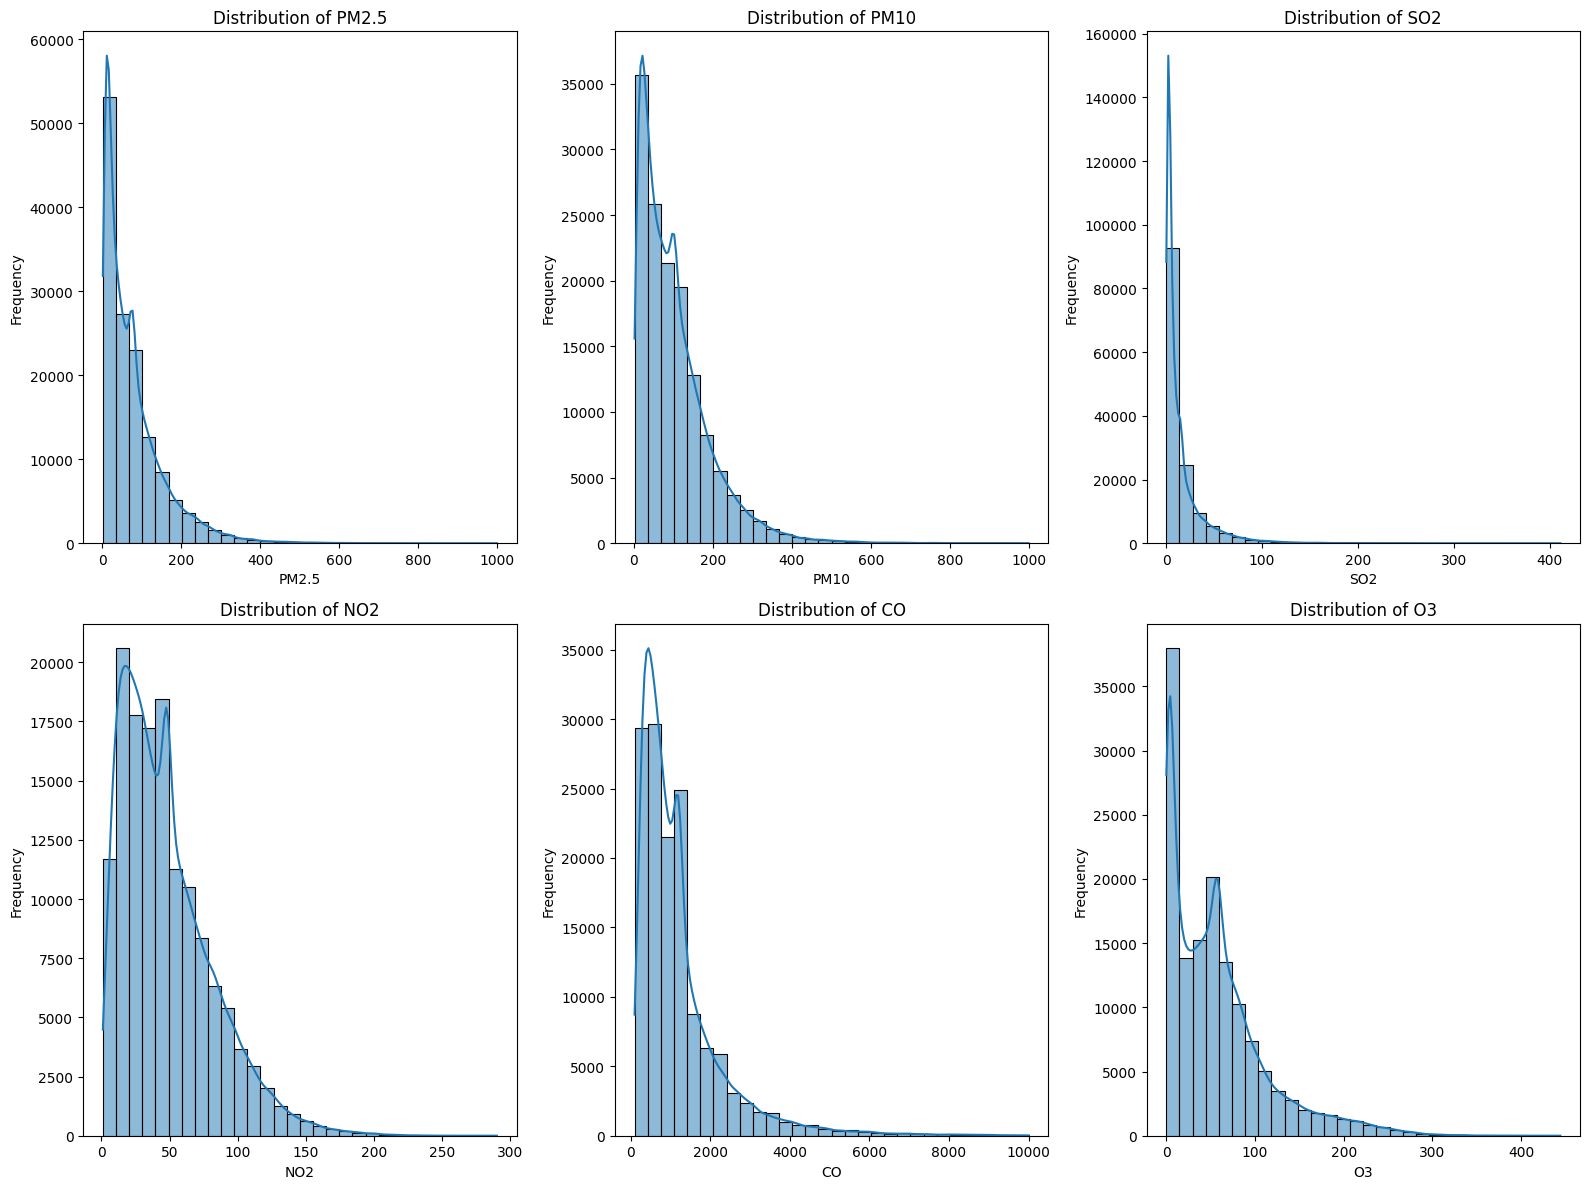

In [29]:
# List of pollutant columns that you want to visualize
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Set up the matplotlib figure with an appropriate size
plt.figure(figsize=(16, 12))

# Loop through each pollutant and plot its histogram with a Kernel Density Estimate
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i + 1)  # Create a 2x3 grid of subplots
    sns.histplot(air_quality_df[pollutant], kde=True, bins=30)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots for a clean layout
plt.show()

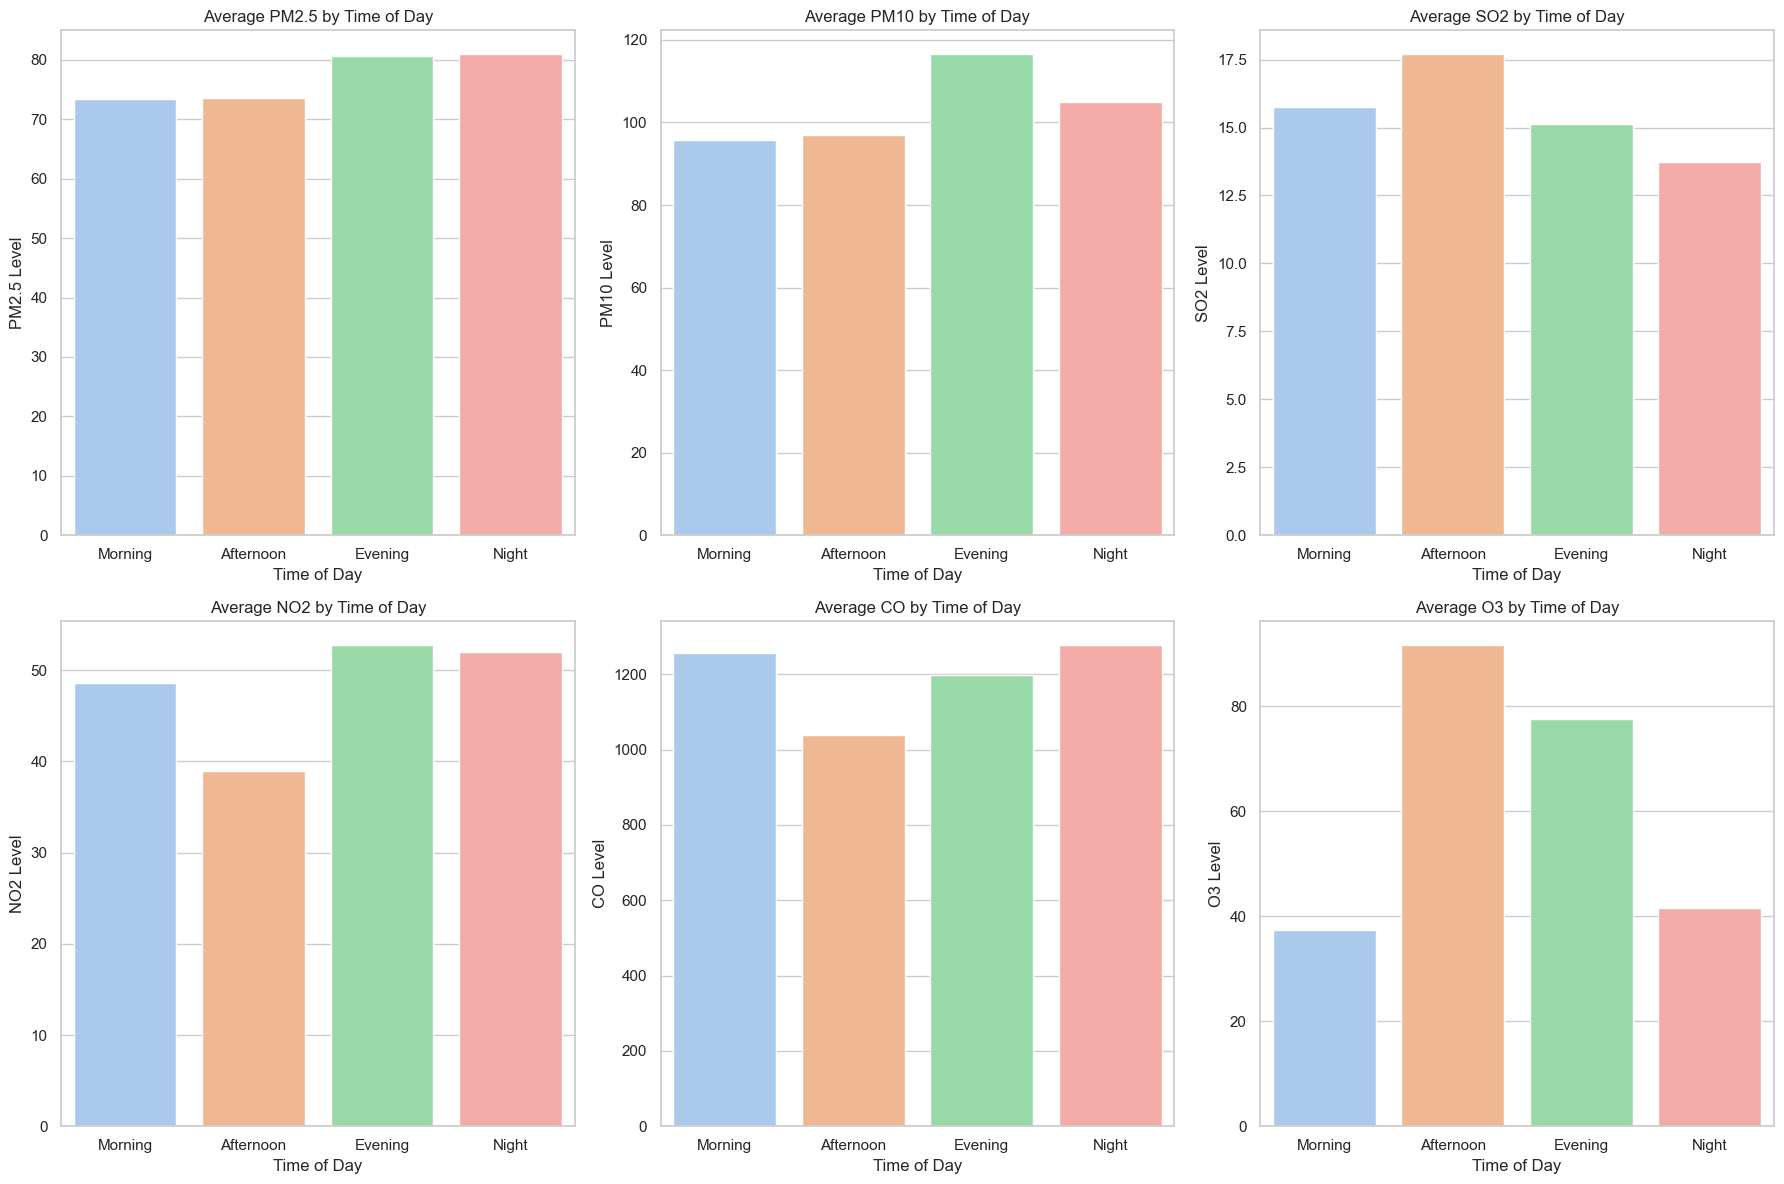

In [30]:
## Bar charts for the distribution of records across different times of day
# List of pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Set up plot
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Create a barplot for each pollutant
for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x='TimeOfDay', y=pollutant, data=air_quality_df, estimator='mean', ci=None, palette='pastel', order=['Morning', 'Afternoon', 'Evening', 'Night'])
    plt.title(f'Average {pollutant} by Time of Day')
    plt.xlabel("Time of Day")
    plt.ylabel(f"{pollutant} Level")

plt.tight_layout()
plt.show()

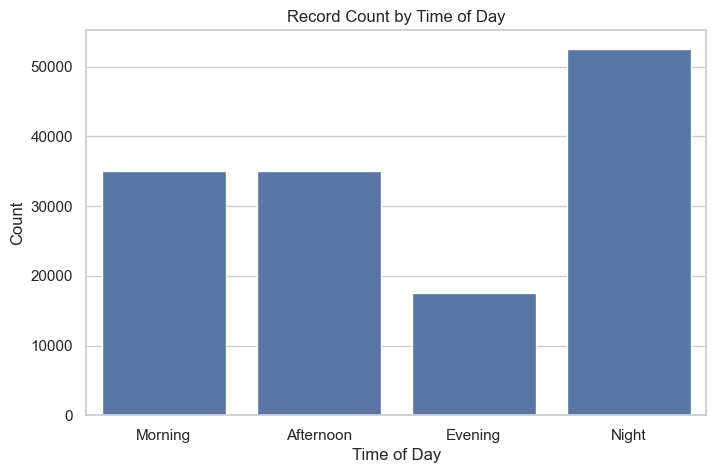

In [31]:
## Bar charts for the distribution of records across different times of day

plt.figure(figsize=(8, 5))
sns.countplot(x='TimeOfDay', data=air_quality_df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Record Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()


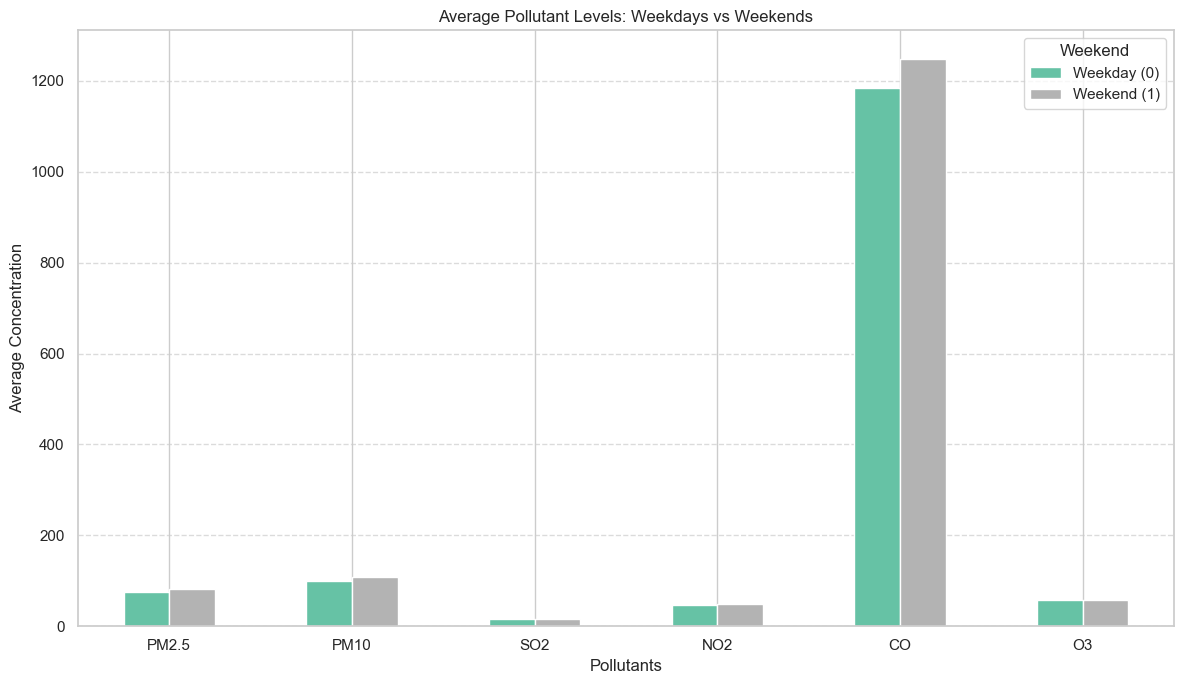

In [32]:
# List of pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Group data by 'Weekend' and compute mean for each pollutant
avg_pollutants = air_quality_df.groupby('Weekend')[pollutants].mean().T

# Rename the index to be more readable
avg_pollutants.index.name = 'Pollutant'

# Plotting
avg_pollutants.plot(kind='bar', figsize=(12, 7), colormap='Set2')
plt.title('Average Pollutant Levels: Weekdays vs Weekends')
plt.xlabel('Pollutants')
plt.ylabel('Average Concentration')
plt.xticks(rotation=0)
plt.legend(title='Weekend', labels=['Weekday (0)', 'Weekend (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

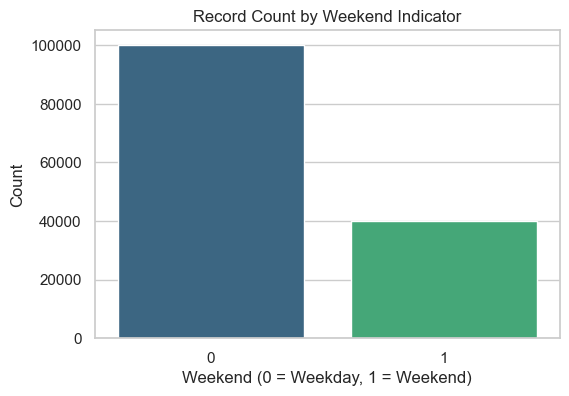

In [33]:
##  Bar charts of the records fall on weekends vs weekdays,

plt.figure(figsize=(6, 4))
sns.countplot(x='Weekend', data=air_quality_df, palette='viridis')
plt.title('Record Count by Weekend Indicator')
plt.xlabel('Weekend (0 = Weekday, 1 = Weekend)')
plt.ylabel('Count')
plt.show()


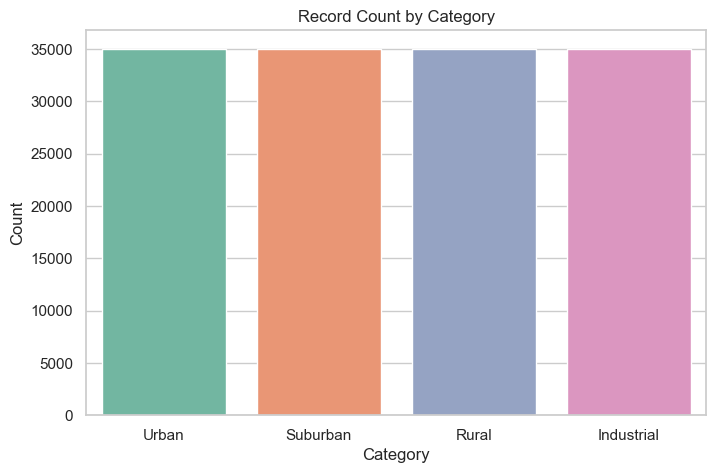

In [34]:
# Plot a bar chart showing counts for each category
# note to myself: every category has 35064 records

plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=air_quality_df, palette='Set2')
plt.title('Record Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Bivariate Analysis for the relationship between two variables: Scatter Plot

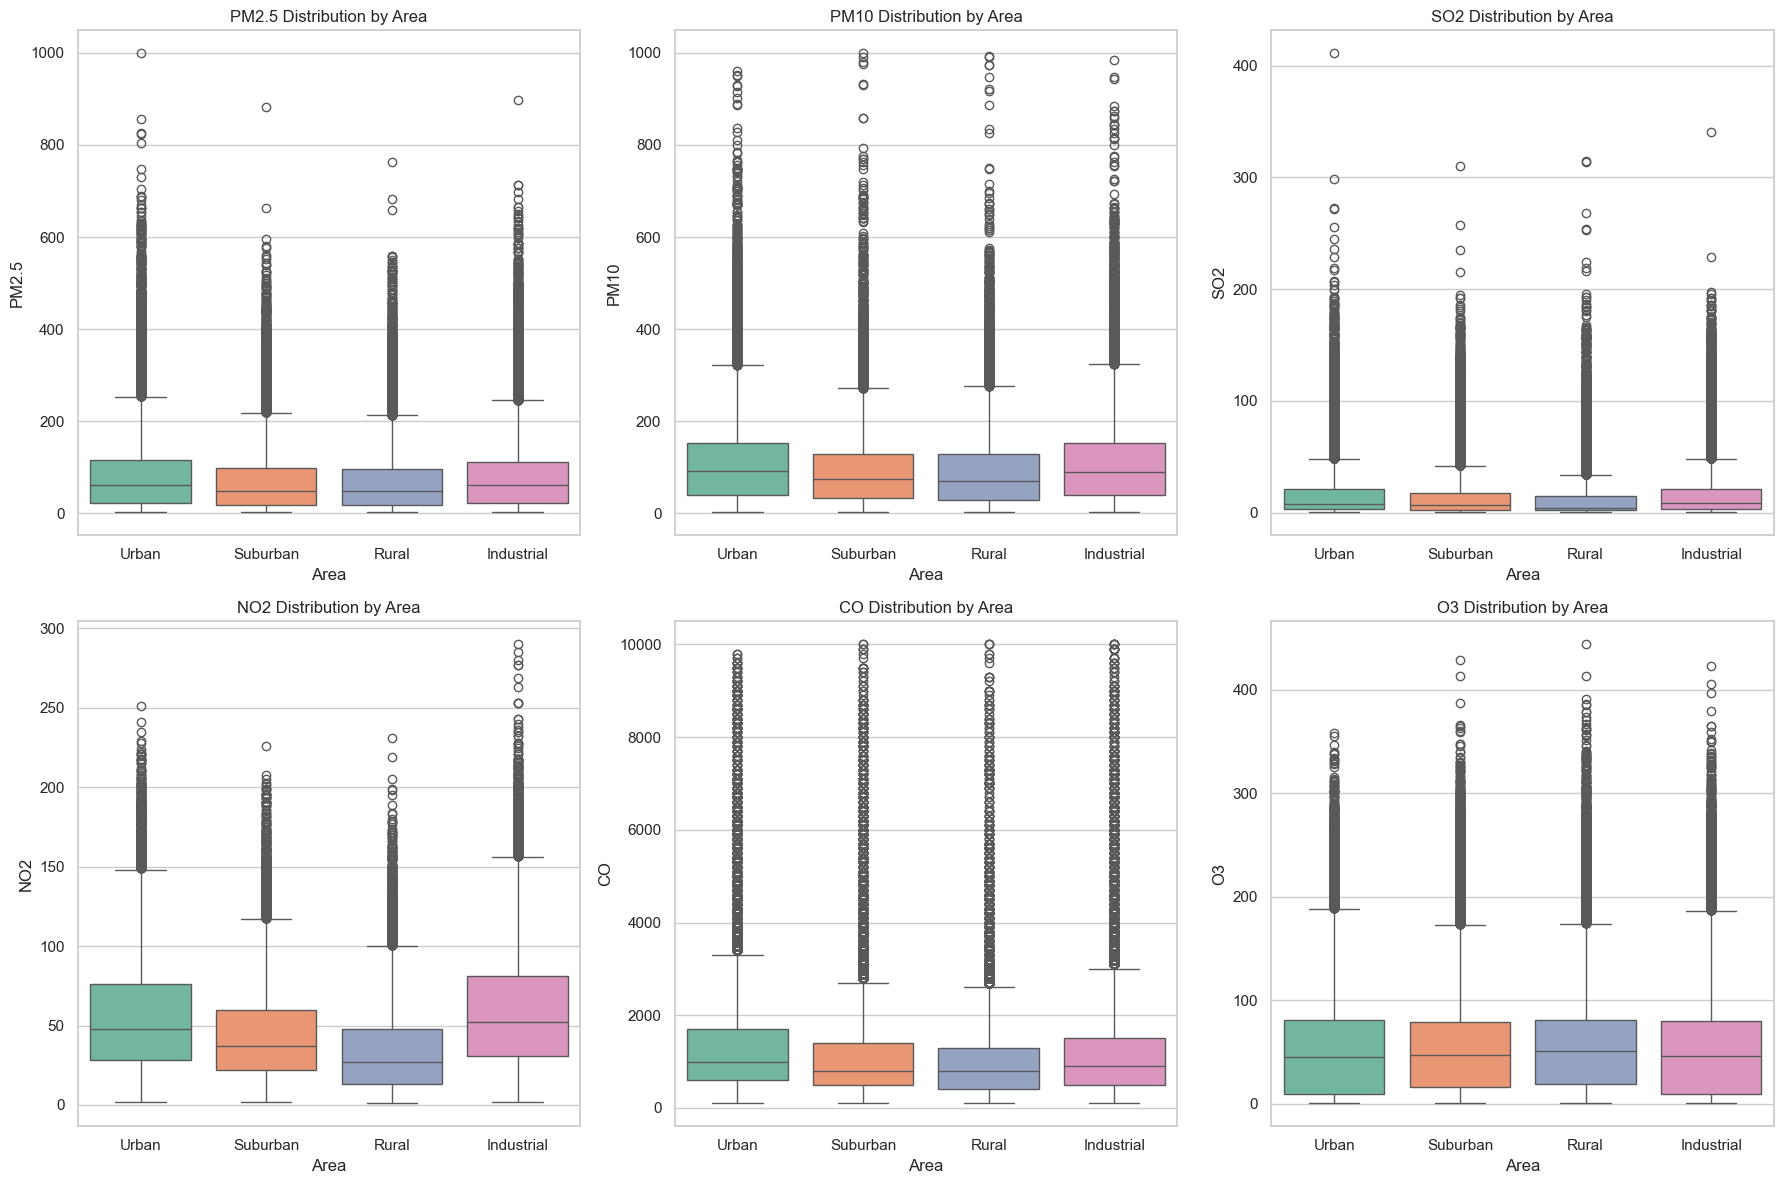

In [35]:
# Define pollutants
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Set plot style
sns.set(style="whitegrid")

# Plot each pollutant's boxplot by Category
plt.figure(figsize=(18, 12))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Category', y=pollutant, data=air_quality_df, palette='Set2')
    plt.title(f'{pollutant} Distribution by Area')
    plt.xlabel('Area')
    plt.ylabel(pollutant)

plt.tight_layout()
plt.show()


In [36]:
# Step 1: Compute average value of each pollutant
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
mean_values = air_quality_df[pollutants].mean()

# Step 2: Identify pollutant with highest average
highest_avg_pollutant = mean_values.idxmax()
print(f"Highest average pollutant: {highest_avg_pollutant}")

Highest average pollutant: CO


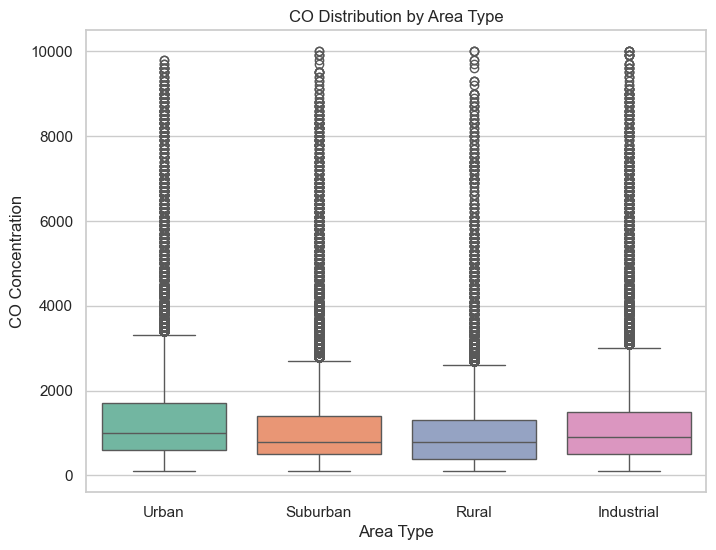

In [37]:
# Boxplot of that pollutant by Area (Category)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Category', y=highest_avg_pollutant, data=air_quality_df, palette='Set2')
plt.title(f'{highest_avg_pollutant} Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel(f'{highest_avg_pollutant} Concentration')
plt.show()

## Multivariate Analysis for interactions between several variables at once          

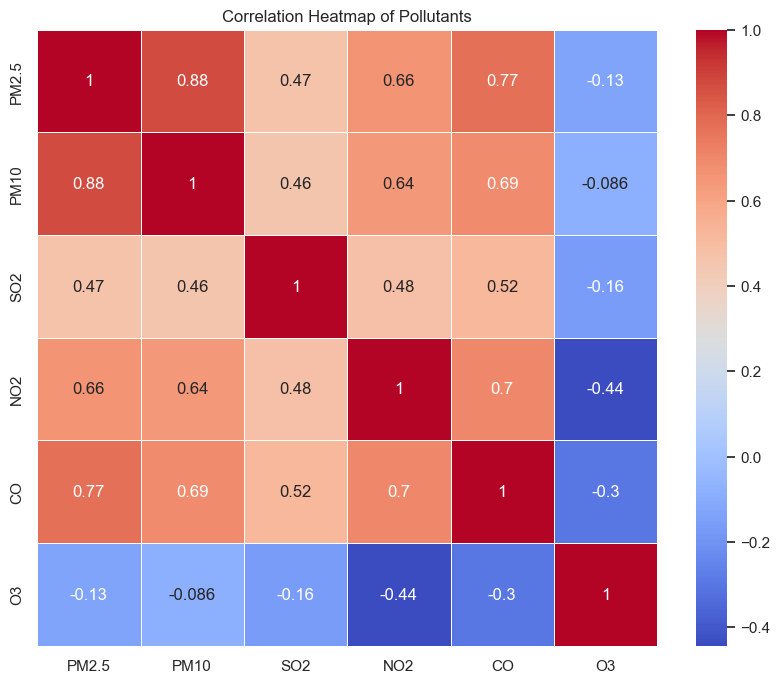

In [38]:
##  Correlation Heatmap of Pollutants
## used only the numeric pollutant columns

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
corr_matrix = air_quality_df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


## Time Series Visualization using Line Plot for Daily Average

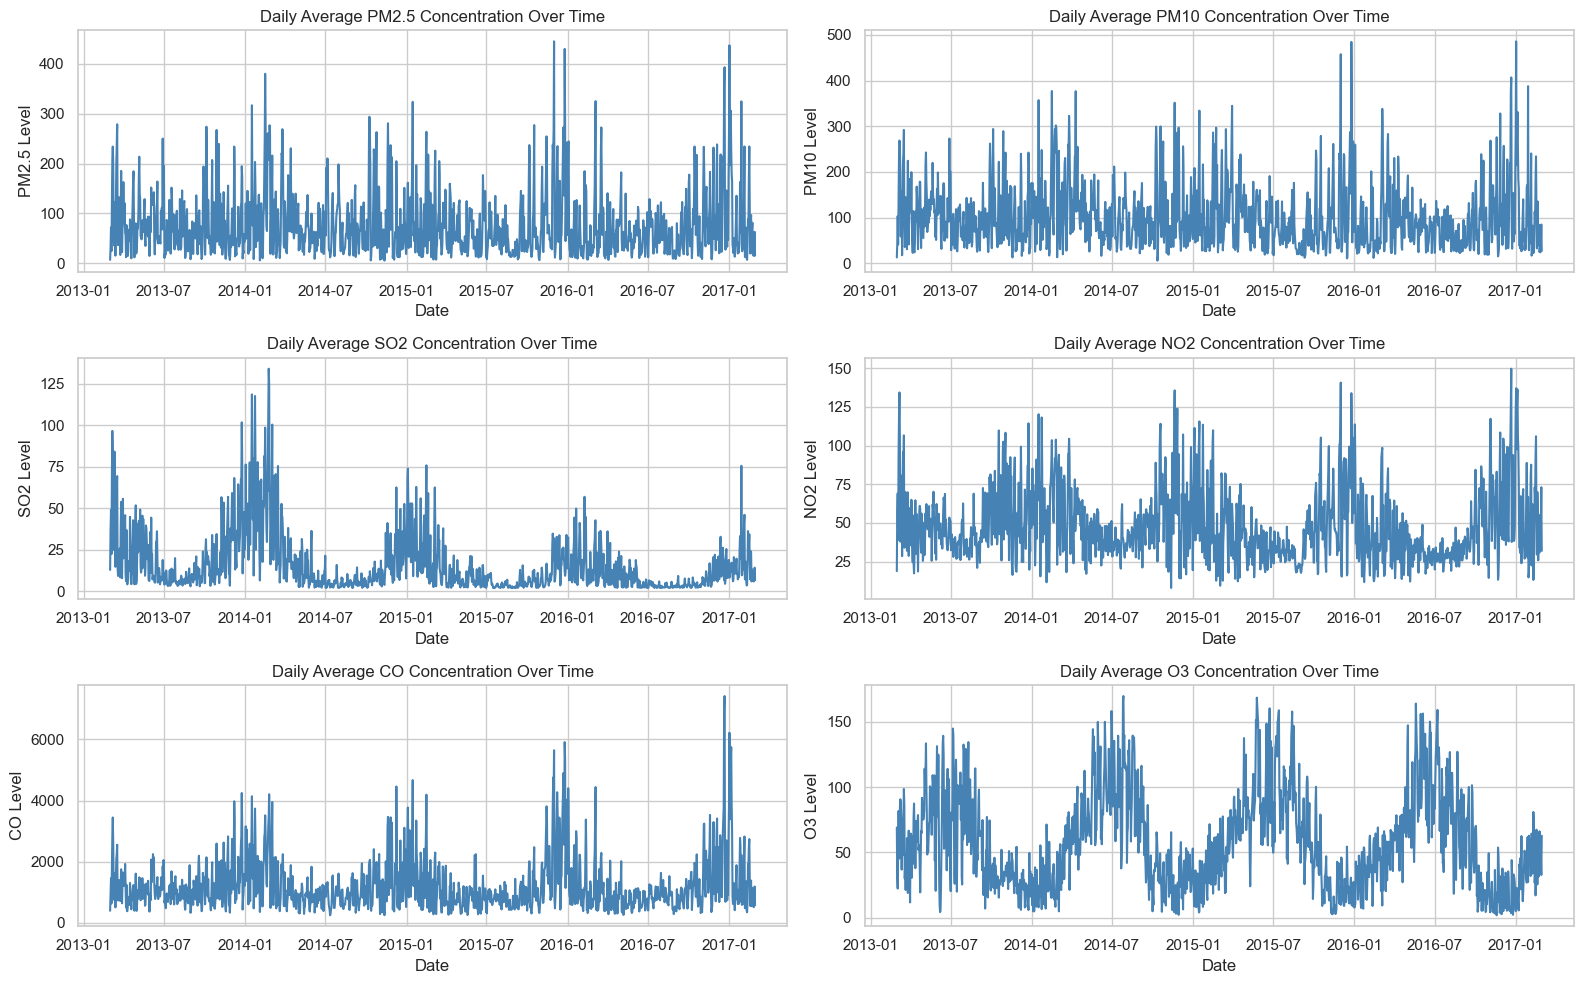

In [39]:
# Ensure Datetime is set as index
air_quality_df.set_index('Datetime', inplace=True)

# List of pollutants to analyze
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Set up the plot
plt.figure(figsize=(16, 10))

# Loop through pollutants and plot each one
for i, pollutant in enumerate(pollutants):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns layout
    daily_avg = air_quality_df[pollutant].resample('D').mean()
    plt.plot(daily_avg, label=f'Daily Avg {pollutant}', color='steelblue')
    plt.title(f'Daily Average {pollutant} Concentration Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Level')
    plt.tight_layout()

plt.show()

# Reset index if needed for further analysis
air_quality_df.reset_index(inplace=True)

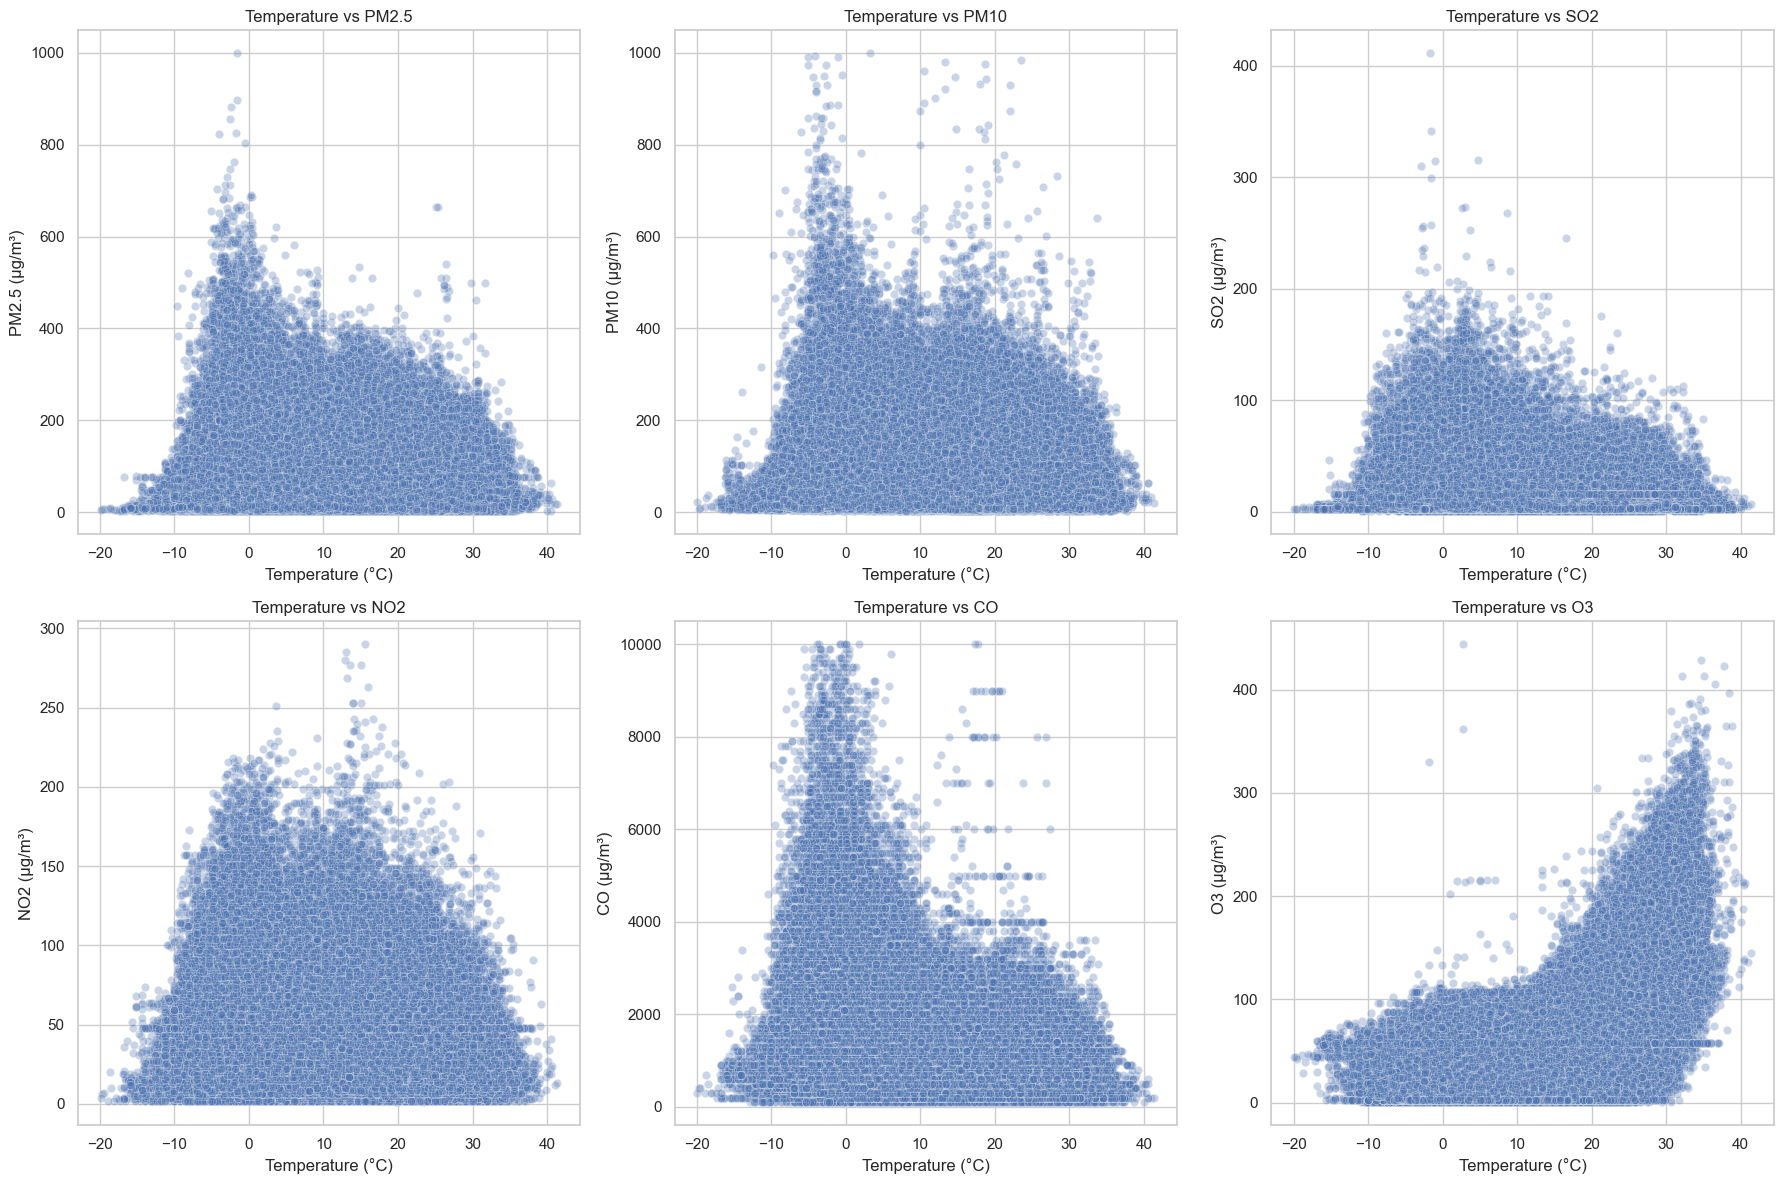

In [40]:
##checking to see non linear features Himanshi

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(18, 12))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='TEMP', y=pollutant, data=air_quality_df, alpha=0.3)
    plt.title(f'Temperature vs {pollutant}')
    plt.xlabel('Temperature (°C)')
    plt.ylabel(f'{pollutant} (µg/m³)')
    plt.grid(True)

plt.tight_layout()
plt.show()

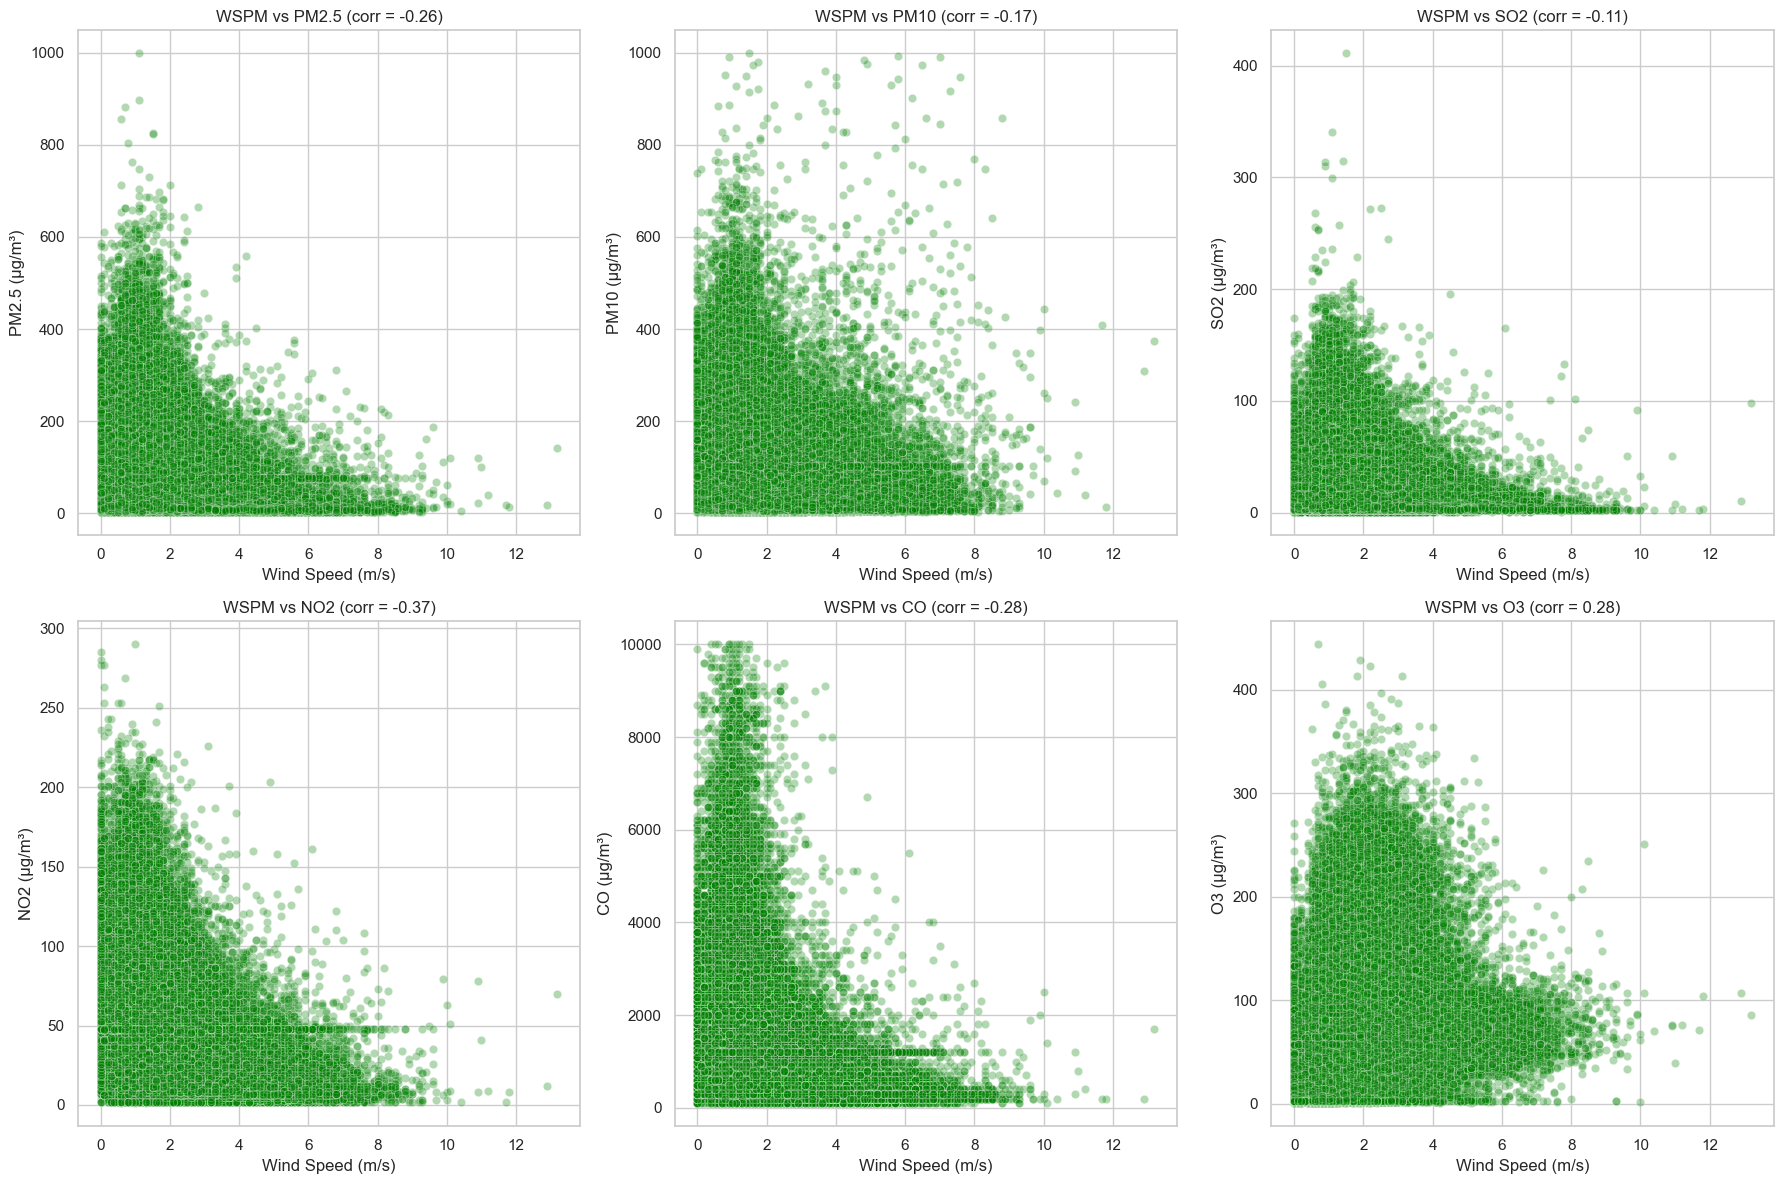

In [41]:
##checking to see non linear features - Himanshi

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

plt.figure(figsize=(18, 12))

for i, pollutant in enumerate(pollutants):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x='WSPM', y=pollutant, data=air_quality_df, alpha=0.3, color='green')
    correlation = air_quality_df['WSPM'].corr(air_quality_df[pollutant])
    plt.title(f'WSPM vs {pollutant} (corr = {correlation:.2f})')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel(f'{pollutant} (µg/m³)')
    plt.grid(True)

plt.tight_layout()
plt.show()


Task 3:  building machine-learning model -  Random Forest 
It handles non-linear relationships,

In [42]:
## Since I have categorical variables like Category, TimeOfDay, DayOfWeek, encoding those Categorical Variables
#one-hot encoding

#X = pd.get_dummies(X, drop_first=True)

In [43]:
## Scaling the numerical features using StandardScaler

#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [44]:
#note: feature scaling -Dropped columns not useful for modeling(done in previous steps- 'Date', 'day', 'month', 'year', 'hour')
## Filled missing numerical values with median (done in previous steps)

from sklearn.model_selection import train_test_split

#selecting features
features = ['PM10', 'SO2', 'NO2', 'CO','O3' ,'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
X = air_quality_df[features]
y = air_quality_df['PM2.5']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit to training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_predict = rf_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Root Mean Squared Error (RMSE): 20.87
R² Score: 0.93
Mean Squared Error: 435.70


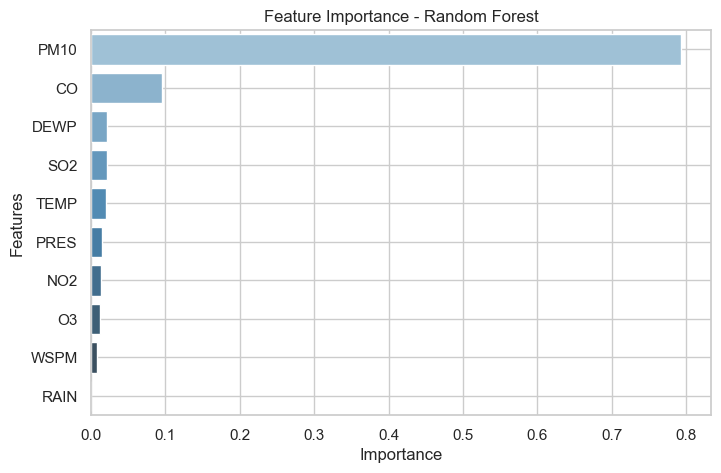

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame of feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='Blues_d')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(True)
plt.show()


Task 4 : Application Development

In [48]:
!pip install streamlit



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
air_quality_df.to_csv('final_air_quality.csv', index=False)


In [50]:
import pandas as pd

# Load the final cleaned dataset
final_df = pd.read_csv('final_air_quality.csv')

# Show the first few rows
print(final_df.head())


              Datetime  No  PM2.5  PM10        SO2        NO2           CO  \
0  2013-03-01 00:00:00   1    9.0   9.0   6.000000  17.000000   200.000000   
1  2013-03-01 01:00:00   2   11.0  11.0   7.000000  14.000000   200.000000   
2  2013-03-01 02:00:00   3    8.0   8.0  15.404718  16.000000   200.000000   
3  2013-03-01 03:00:00   4    8.0   8.0   3.000000  16.000000  1202.081876   
4  2013-03-01 04:00:00   5    8.0   8.0   3.000000  47.953712   300.000000   

          O3  TEMP    PRES  DEWP  RAIN   wd  WSPM        station Category  \
0  62.000000   0.3  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong    Urban   
1  66.000000  -0.1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong    Urban   
2  59.000000  -0.6  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong    Urban   
3  57.592851  -0.7  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong    Urban   
4  36.000000  -0.9  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong    Urban   

   DayOfWeek  Weekend TimeOfDay  
0          4        0     Night  
